In [2]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
# Define the Euler's method
def euler(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    return x, y
# Define the midpoint method
def midpoint(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h *f(x[i]+h/2,y[i]+h/2*f(x[i],y[i]))
        x[i+1] = x[i] + h
    return x, y
# Define the Heun's method
def heun(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i]+h*f(x[i], y[i])))
        x[i+1] = x[i] + h
    return x, y
import numpy as np

def rk2(f, t0, y0,h,n,t_eval=None):
    n = n + 1
    t = np.arange(t0, t0+n/(1/h), h)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(len(t)-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + (h / 2) * (k1 + k2)
    
    if t_eval is not None:
        y_eval = np.interp(t_eval, t, y)
        return y_eval
    else:
        return t, y
def rk4(f, t0, y0,h,n,t_eval=None):
    n = n+1
    t = np.arange(t0, t0+n/(1/h), h)
    y = np.zeros(len(t))
    y[0] = y0

    # RK4 method
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k1 * h)
        k3 = f(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k2 * h)
        k4 = f(t[i-1] + h, y[i-1] + k3 * h)
        y[i] = y[i-1] + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    if t_eval is not None:
        y_eval = np.interp(t_eval, t, y)
        return y_eval
    else:
        return t, y

Eq(y(x), -x**2 - 2*x + 3.5*exp(x) - 3)

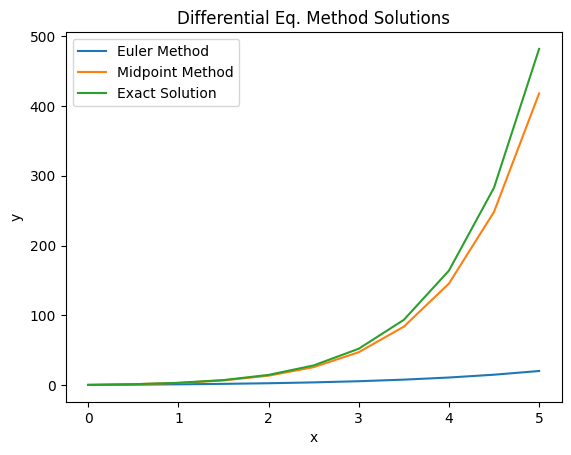

In [3]:
# Define the variable and function
x = sym.Symbol('x')
y = sym.Function('y')(x)

# Define the differential equation
diff_eq = sym.Eq(sym.diff(y, x), 1+x**2+y)

# Define the initial condition
init_cond = {y.subs(x, 0): 0.5}

# Solve the differential equation with the initial condition
sol = sym.dsolve(diff_eq, ics=init_cond)

# Print the solution
display(sol)
# Define the differential equation to solve
def f(x, y):
    return 1+y+x**2

# Set up the initial conditions and parameters
x0 = 0
y0 = 0.5
h = 0.5
n = 10

# Solve the differential equation using the Euler's method
x, y1 = euler(f, x0, y0,0.5*h, n)
x, y2 = midpoint(f, x0, y0, h, n)
# Plot the solution
plt.plot(x, y1, label='Euler Method')
plt.plot(x, y2, label='Midpoint Method')
plt.plot(x,-x**2-2*x+3.5*np.exp(x)-3, label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Differential Eq. Method Solutions")
plt.legend()
plt.show()

In [4]:
def f(x, y):
    return 1+y+x**2
x0 = 0
y0 = 0.5
h = 0.5
n = 10
def h1(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i]+h*f(x[i], y[i])))
        x[i+1] = x[i] + h
    return x, y
def h2(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i]+h*f(x[i], y[i])))))
        x[i+1]=x[i]+h
    return x, y
def h3(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h/2 * (f(x[i],y[i]) +f(x[i]+h,y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i] + h/2 * (f(x[i],y[i]) + f(x[i]+h,y[i]+h*f(x[i], y[i])))))))
        x[i+1] = x[i] + h
    return x, y
x1, hn1 = h1(f, x0, y0, h, n)
x2, hn2 = h2(f, x0, y0, h, n)
x1, hn3 = h3(f, x0, y0, h, n)
x = np.zeros(2*n+1)
exact = np.zeros(n+1)
def calculate_rms(array1, array2):
    # Calculate the square of the difference between the two arrays
    diff_squared = (array1 - array2) ** 2
    
    # Calculate the mean of the squared differences
    mean_diff_squared = np.mean(diff_squared)
    
    # Calculate the root mean square (RMS) by taking the square root of the mean of the squared differences
    rms = np.sqrt(mean_diff_squared)
    
    # Return the RMS
    return rms
for i in range(-1,8,1):
    x[i+1]=x[i]+0.5/2
    exact[i+1]=-x[i]**2-2*x[i]+4*np.exp(x[i])-3
print('For one iteration, the rms is: %.6f, two iterations: %.6f, three iterations: %.6f' %(calculate_rms(hn1, exact),calculate_rms(hn2, exact),calculate_rms(hn3, exact)))


For one iteration, the rms is: 155.880689, two iterations: 186.330909, three iterations: 194.679788


Exact Solution:


Eq(y(x), -x**2 - 2*x + 3.5*exp(x) - 3)

The table:


n       Euler         Exact         %Error        
1       0.5150000000  0.5150755848  0.0146745054  
2       0.5301510000  0.5303046901  0.0289814698  
3       0.5454565100  0.5456908688  0.0429471796  
4       0.5609200751  0.5612377097  0.0565953727  
5       0.5765452759  0.5769488373  0.0699475307  
6       0.5923357286  0.5928279129  0.0830231318  
7       0.6082950859  0.6088786344  0.0958398704  
8       0.6244270368  0.6251047369  0.1084138494  
9       0.6407353071  0.6415099930  0.1207597473  
10      0.6572236602  0.6580982133  0.1328909658  

n       Midpoint      Exact         %Error        
1       0.5150752500  0.5150755848  0.0000649991  
2       0.5303040113  0.5303046901  0.0001280078  
3       0.5456898366  0.5456908688  0.0001891660  
4       0.5612363144  0.5612377097  0.0002486006  
5       0.5769470694  0.5769488373  0.0003064263  
6       0.5928257624  0.5928279129  0.0003627474  
7       0.6088760914  0.6088786344  0.0004176590  
8       0.6251017

<function matplotlib.pyplot.show(close=None, block=None)>

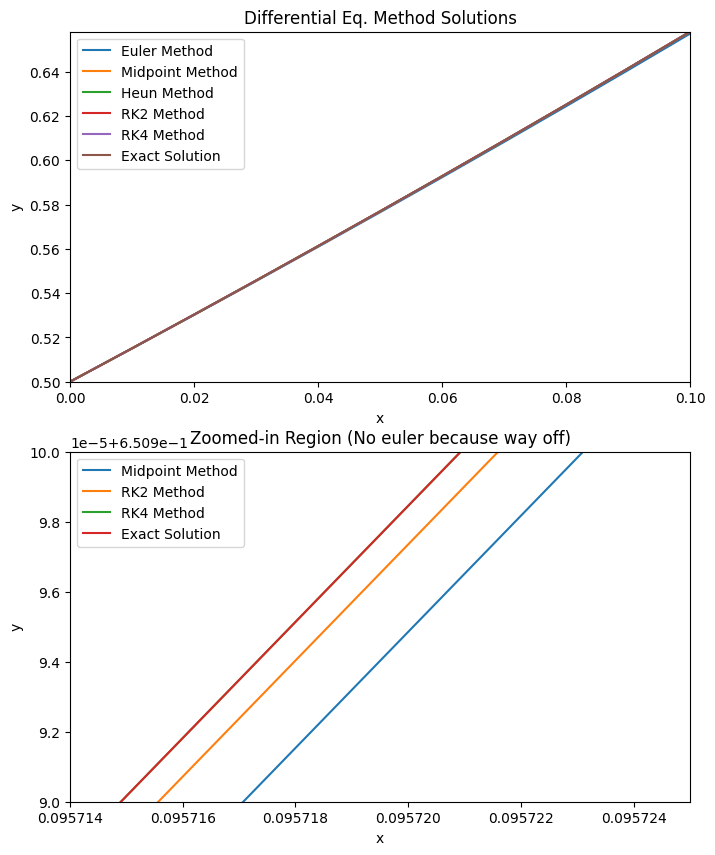

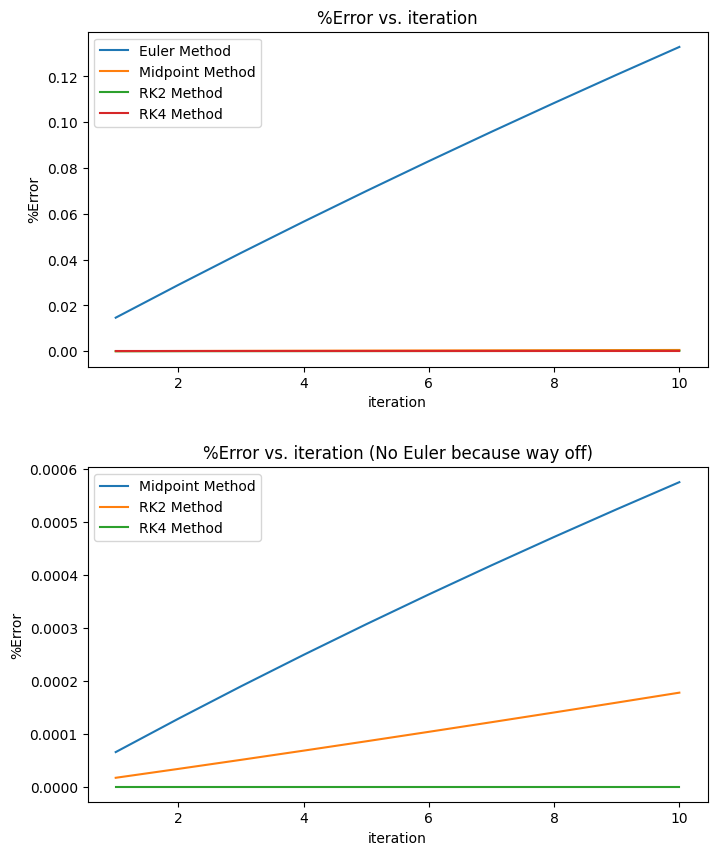

In [5]:

# Define the variable and function
x = sym.Symbol('x')
y = sym.Function('y')(x)

# Define the differential equation
diff_eq = sym.Eq(sym.diff(y, x), 1+x**2+y)

# Define the initial condition
init_cond = {y.subs(x, 0): 0.5}

# Solve the differential equation with the initial condition
sol = sym.dsolve(diff_eq, ics=init_cond)
sol_lambda = sym.lambdify(x, sol.args[1])
print('Exact Solution:')

# Print the solution
display(sol)

# Define the differential equation to solve
def f(x, y):
    return 1+y+x**2

# Set up the initial conditions and parameters
x0 = 0
y0 = 0.5
h = 0.01
n = 10

# Solve
x, yeu= euler(f, x0, y0,h, n)
x, ymid= midpoint(f, x0, y0,h, n)
x, yhe= heun(f, x0, y0,h, n)
x, yr2= rk2(f, x0, y0,h, n)
x, yr4= rk4(f, x0, y0,h, n)
print("The table:\n")
print("\n%-8s%-14s%-14s%-14s"%( "n", "Euler", "Exact", "%Error"))
erroreu=np.zeros(len(yeu))
for i in range(1,n+1,1):
    erroreu[i]=(sol_lambda(x[i])-yeu[i])/sol_lambda(x[i])*100
    print('%-8d%-14.10f%-14.10f%-14.10f' %(i,yeu[i],sol_lambda(x[i]),erroreu[i]))
print("\n%-8s%-14s%-14s%-14s"%( "n", "Midpoint", "Exact", "%Error"))
errormid=np.zeros(len(ymid))
for i in range(1,n+1,1):
    errormid[i]=(sol_lambda(x[i])-ymid[i])/sol_lambda(x[i])*100
    print('%-8d%-14.10f%-14.10f%-14.10f' %(i,ymid[i],sol_lambda(x[i]),errormid[i]))
print("\n%-8s%-14s%-14s%-14s"%( "n", "Heun", "Exact", "%Error"))
errorhe=np.zeros(len(yhe))
for i in range(1,n+1,1):
    errorhe[i]=(sol_lambda(x[i])-yhe[i])/sol_lambda(x[i])*100
    print('%-8d%-14.10f%-14.10f%-14.10f' %(i,yhe[i],sol_lambda(x[i]),errorhe[i]))
print("\n%-8s%-14s%-14s%-14s"%( "n", "RK2", "Exact", "%Error"))
errorr2=np.zeros(len(yr2))
for i in range(1,n+1,1):
    errorr2[i]=(sol_lambda(x[i])-yr2[i])/sol_lambda(x[i])*100
    print('%-8d%-14.10f%-14.10f%-14.10f' %(i,yr2[i],sol_lambda(x[i]),errorr2[i]))
print("\n%-8s%-14s%-14s%-14s"%( "n", "RK4", "Exact", "%Error"))
errorr4=np.zeros(len(yr4))
for i in range(1,n+1,1):
    errorr4[i]=(sol_lambda(x[i])-yr4[i])/sol_lambda(x[i])*100
    print('%-8d%-14.10f%-14.10f%-14.10f' %(i,yr4[i],sol_lambda(x[i]),errorr4[i]))
print('Methods'' average error')
print('The average %%error of the Euler method is:    %.10f%%' %(np.mean(erroreu[1::])))
print('The average %%error of the Midpoint method is: %.10f%%' %(np.mean(errormid[1::])))
print('The average %%error of the Heun method is:     %.10f%%' %(np.mean(errorhe[1::])))
print('The average %%error of the RK2 method is:      %.10f%%' %(np.mean(errorr2[1::])))
print('The average %%error of the RK4 method is:      %.10f%%' %(np.mean(errorr4[1::])))

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot the solution in the first subplot
ax1.plot(x, yeu, label='Euler Method')
ax1.plot(x, ymid, label='Midpoint Method')
ax1.plot(x, yhe, label='Heun Method')
ax1.plot(x, yr2, label='RK2 Method')
ax1.plot(x, yr4, label='RK4 Method')
ax1.plot(x, -x**2 - 2*x + 3.5*np.exp(x) - 3, label='Exact Solution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title("Differential Eq. Method Solutions")
ax1.legend()

# Set limits for x and y axes in the first subplot
ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(yr4.min(), yr4.max())

# Plot the zoomed-in region in the second subplot
ax2.plot(x, ymid, label='Midpoint Method')
ax2.plot(x, yr2, label='RK2 Method')
ax2.plot(x, yr4, label='RK4 Method')
ax2.plot(x, -x**2 - 2*x + 3.5*np.exp(x) - 3, label='Exact Solution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Zoomed-in Region (No euler because way off)")
ax2.legend()

# Set limits for x and y axes in the second subplot
ax2.set_xlim(0.095714, 0.095725)
ax2.set_ylim(0.65099, 0.651)

# Error plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))


ax1.plot(list(range(1,11,1)), erroreu[1::], label='Euler Method')
ax1.plot(list(range(1,11,1)), errormid[1::], label='Midpoint Method')
ax1.plot(list(range(1,11,1)), errorr2[1::], label='RK2 Method')
ax1.plot(list(range(1,11,1)), errorr4[1::], label='RK4 Method')
ax1.set_xlabel('iteration')
ax1.set_ylabel('%Error')
ax1.set_title("%Error vs. iteration")
ax1.legend()

ax2.plot(list(range(1,11,1)), errormid[1::], label='Midpoint Method')
ax2.plot(list(range(1,11,1)), errorr2[1::], label='RK2 Method')
ax2.plot(list(range(1,11,1)), errorr4[1::], label='RK4 Method')
ax2.set_xlabel('iteration')
ax2.set_ylabel('%Error')
ax2.set_title("%Error vs. iteration (No Euler because way off)")
ax2.legend()

plt.subplots_adjust(hspace=0.3)
plt.show

Two Differential Equations:


Eq(Derivative(x(t), t), v(t))

Eq(Derivative(v(t), t), -omega**2*x(t))

Eq(x(t), cos(omega*t))

Eq(v(t), -omega*sin(omega*t))

Eq(omega, sqrt(k/m))

Using h=0.01, and hence 1000 steps


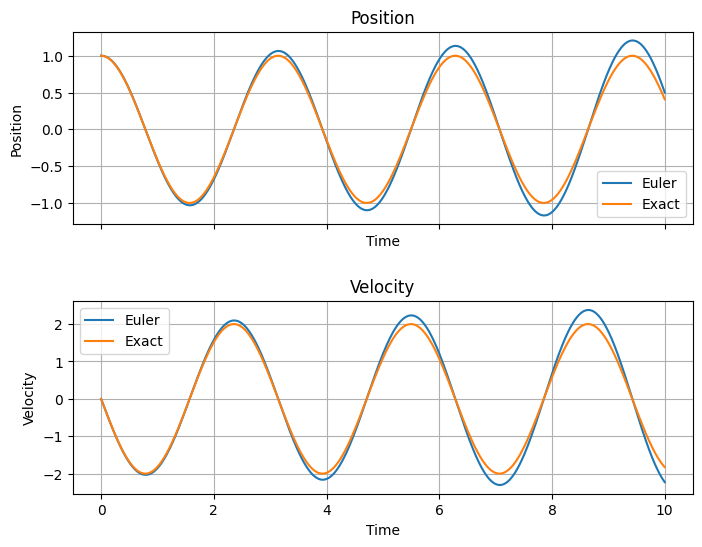

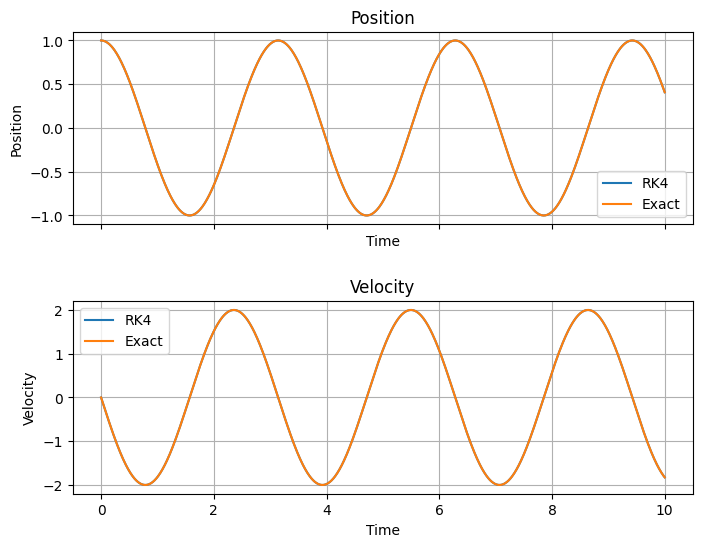

All in one plot:


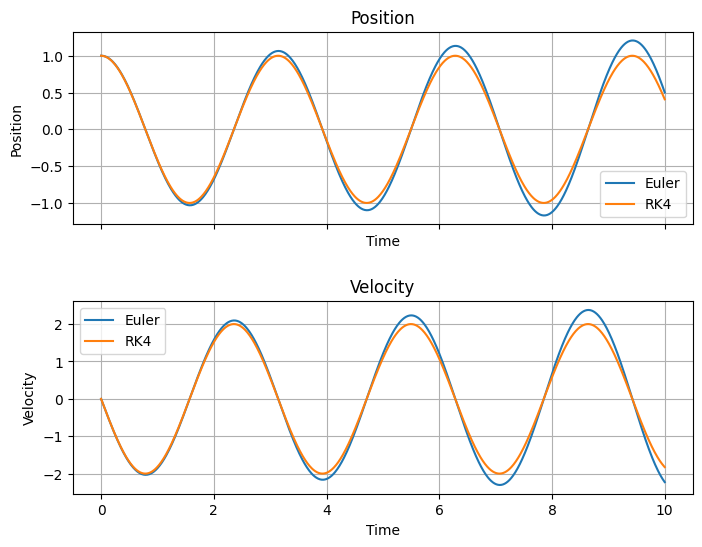

In [6]:

# Define the variable and function
from sympy.abc import k, m, omega
t = sym.Symbol('t')
x = sym.Function('x')(t)
v = sym.Function('v')(t)
# Define the differential equation
diff_eq = sym.Eq(sym.diff(x, t,2), -omega**2*x)
init_cond = {x.subs(t, 0): 1,sym.diff(x, t).subs(t, 0): 0}

# # Solve the differential equation with the initial condition
sol = sym.dsolve(diff_eq, ics=init_cond)
sol_lambda_x = sym.lambdify(t, sol.args[1].simplify().subs(omega,2))
sol_lambda_v = sym.lambdify(t, sym.diff(sol.args[1],t).simplify().subs(omega,2))
print('Two Differential Equations:')

# Print the solutions
display(sym.Eq(sym.diff(x,t),v))
display(sym.Eq(sym.diff(v,t),-omega**2*x))
display(sol.simplify())
display(sym.Eq(v,sym.diff(sol.args[1],t)).simplify())
display(sym.Eq(omega,sym.sqrt(k/m)))

def f(x, v):
    # Parameters
    m = 4.0 # mass
    k = 16.0 # spring constant
    
    # Define the derivatives
    du_dt = v
    dv_dt = -k*x/m
    
    return dv_dt, du_dt

def euler(f, x0, v0, h, n, t_eval=None):
    n = n+1
    x = np.arange(x0, x0+n/(1/h), h)
    u = np.zeros(len(x))
    v = np.zeros(len(x))
    u[0] = x0
    v[0] = v0

    # Euler method
    for i in range(1, len(x)):
        dv_dt, du_dt = f(u[i-1], v[i-1])
        u[i] = u[i-1] + h * du_dt
        v[i] = v[i-1] + h * dv_dt

    return u, v
def rk4(f, x0, v0, h, n, t_eval=None):
    n = n+1
    x = np.arange(x0, x0+n/(1/h), h)
    u = np.zeros(len(x))
    v = np.zeros(len(x))
    u[0] = x0
    v[0] = v0

    # RK4 method
    for i in range(1, len(x)):
        k1_v, k1_u = f(u[i-1], v[i-1])
        k2_v, k2_u = f(u[i-1] + 0.5 * h * k1_u, v[i-1] + 0.5 * h * k1_v)
        k3_v, k3_u = f(u[i-1] + 0.5 * h * k2_u, v[i-1] + 0.5 * h * k2_v)
        k4_v, k4_u = f(u[i-1] + h * k3_u, v[i-1] + h * k3_v)

        u[i] = u[i-1] + (h/6) * (k1_u + 2 * k2_u + 2 * k3_u + k4_u)
        v[i] = v[i-1] + (h/6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return u, v
print('Using h=0.01, and hence 1000 steps')
n=1000
h=0.01
x, v= euler(f, 1, 0, h, n)
x1, v1= rk4(f, 1, 0, h, n)
t = np.linspace(0, n*h, n+1)


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Position data for Euler
ax1.plot(t, x, label='Euler')
ax1.plot(t, sol_lambda_x(t), label='Exact')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()
ax1.set_title('Position')
ax1.grid()

# Velocity data
ax2.plot(t, v, label='Euler')
ax2.plot(t, sol_lambda_v(t), label='Exact')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.set_title('Velocity')
ax2.grid()

plt.subplots_adjust(hspace=0.4)
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
# Position data for RK4
ax1.plot(t, x1, label='RK4')
ax1.plot(t, sol_lambda_x(t), label='Exact')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()
ax1.set_title('Position')
ax1.grid()

# Velocity data
ax2.plot(t, v1, label='RK4')
ax2.plot(t, sol_lambda_v(t), label='Exact')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.set_title('Velocity')
ax2.grid()

plt.subplots_adjust(hspace=0.4)
plt.show()
print('All in one plot:')
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Position data for both
ax1.plot(t, x, label='Euler')
ax1.plot(t, x1, label='RK4')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()
ax1.set_title('Position')
ax1.grid()

# Velocity data
ax2.plot(t, v, label='Euler')
ax2.plot(t, v1, label='RK4')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.set_title('Velocity')
ax2.grid()

plt.subplots_adjust(hspace=0.4)
plt.show()